# Clustering

All the models you have used up to this point in the course have been <b>supervised</b> machine learning models, where you supply a model with some predictors and a target, and find the relationship between them. This is particularly useful when you want to predict what group a piece of data falls into.

But what happens if you don't know what the groups are? 

Imagine you have collected feedback scores from your customers and you suspect they can be divided into groups or segments. Everyone within each segment will have something in common (e.g. age, location, etc) but you aren't quite sure how they should be separated? This is where clustering methods come in.

Clustering is an example of <b>unsupervised</b> machine learning where we supply data to a model and ask it to find segments (or clusters) within the data. This has two main applications for business- <b>meaningfulness</b> and <b>usefulness</b>.

<ul>
    <li> <b>Meaningful</b>- what do our clusters represent? For example, if we were to run an advert and collect data on engagement, we can use clustering to identify segments within the target audience who respond differently to the advert.</li>
    <li> <b>Useful</b>- what can we use our clusters for? For example, we want to build a model which predicts what group a customer may fall into when shown an advert, but we don't know what the groups are. We can use clustering to identify the segments, then build a classification model after to predict where a new customer might go.</li>
</ul>

Another application of clustering is image recognition, as these types of models can be used to group clusters of pixels together to detect images.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

# I(ris) spy

For this demonstration we are going to be using the Iris dataset we saw in module 8. As a reminder, the dataset contains information on the petal and sepal dimensions of different species of iris (setosa, versicolor, virginica). Normally we wouldn't have the labels already, but for the purposes of this demonstration we are going to use this data so we can compare our model outputs to the true data.

In [2]:
# Load in data and convert to dataframe

iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['species']=iris.target
iris_df['species_name']=iris_df.species.map({0:'setosa',1:'versicolor',2:'virginica'})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Let's take a look at our data and see what the actual clusters are:

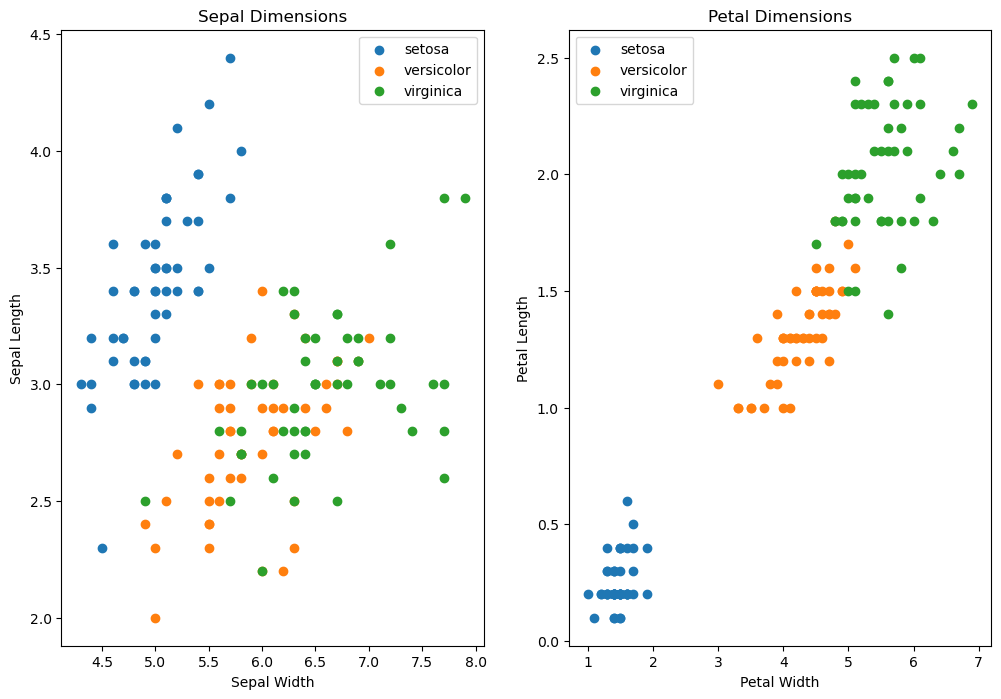

In [3]:
fig, ax = plt.subplots(ncols=2,figsize=(12,8))

for species in iris.target_names:
    sub_df=iris_df[iris_df.species_name==species]
    ax[0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=species)
    ax[1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=species)
    
ax[0].set_ylabel('Sepal Length')
ax[0].set_xlabel('Sepal Width')
ax[0].set_title('Sepal Dimensions')
ax[0].legend()
ax[1].set_ylabel('Petal Length')
ax[1].set_xlabel('Petal Width')
ax[1].set_title('Petal Dimensions')
ax[1].legend()
plt.show()

Plotting the data this way allows us to clearly see where the real clusters are within the data. Now we know this, we can compare the results from any clutsering model we choose.

But what model do we choose? 

Broadly, clustering models fall into one of three categories:

<ol>
    <li> Partitional</li>
    <li> Density-based</li>
    <li> Hierarchical </li>
</ol>

We will look at an example from all 3 as well as the advantages and disadvantages. Another thing to mention is how the data is shaped. In the sepal example above we can see the data is well scattered about (this is common), but sometimes that data can take on complex shapes (especially if we are trying to do image recognition). 

## 1) Partitional

In partitional clustering, the model divides the data into non-overlapping groups (no data point can belong to more than one cluster). To use these models, you need to specifiy the number of clusters before you begin (denoted by <i>k</i>) and the model will use an iterative process to assign each datapoint into a cluster.

The advantages of these types of model are that they are efficient with data which falls in a spherical shape and can be scaled to more complex datasets. The disadvantages are that these types of models do not handle complex shapes of data well and also struggle if clusters have different densities of data.

The most common type of partitional clustering model is <b>k-means</b>.

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

To use a kmeans model you need to tell it how many clusters you want it to identify (k). It will then randommly select k centroids (the centre of a cluster) and assign each data point to the nearest one. It will then calculate the <b>sum of squared error (SSE)</b>, which is how far away on average each data point in a cluster is from the centroid. It will then repeat this process until it has found the smallest SSE.

An issue that we need to be aware of is that clustering models are sensitive to scales within the data. For example, if within a dataset we have a feature that ranges from 0 to 1, and another that ranges from 0 to 100, the model will put much more emphasis on the larger scale, and will ignore the smaller one.

To sort this out, we can standardize our data. This means transforming all columns so that the values are on the same scale. To do this, for each column calculate the mean and standard deviation and then for each value subtract the mean and divide by the standard deviation. 

Or, we can use sklearns function which does all the work for us!

In [5]:
features=iris_df.iloc[:,0:4] #select the four columns on iris dimensions

scaler = StandardScaler() #initialize the scaler
features_std=scaler.fit_transform(features) #fit the data and transform (standardize)

Let's see what the standardised data looks like:

In [6]:
iris_std=pd.DataFrame(features_std,columns=features.columns)
iris_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Observe how all features are now on the same scale, so our model should give equal weighting to each feature.

With this data, we can now build our model:

In [7]:
kmeans = KMeans(
   init="random", #method for initializing the model, only change this if you know where the clusters should be
   n_clusters=3, #how many clusters you want it to find
   random_state=42,
   n_init = 'auto',
   )

kmeans.fit(features_std)

KMeans(init='random', n_clusters=3, n_init='auto', random_state=42)

And that is the model built!

Let's check the output, first, what are the centres (centroids) of each cluster?

In [8]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

Secondly, what is the SSE, the average distance each data point is from its nearest centroid?

In [9]:
kmeans.inertia_

139.8204963597498

Let's also check which cluster each datapoint has been assigned to:

In [10]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Using this information, we can then replot our data to see the clusters (and then compare it to the actual clusters).

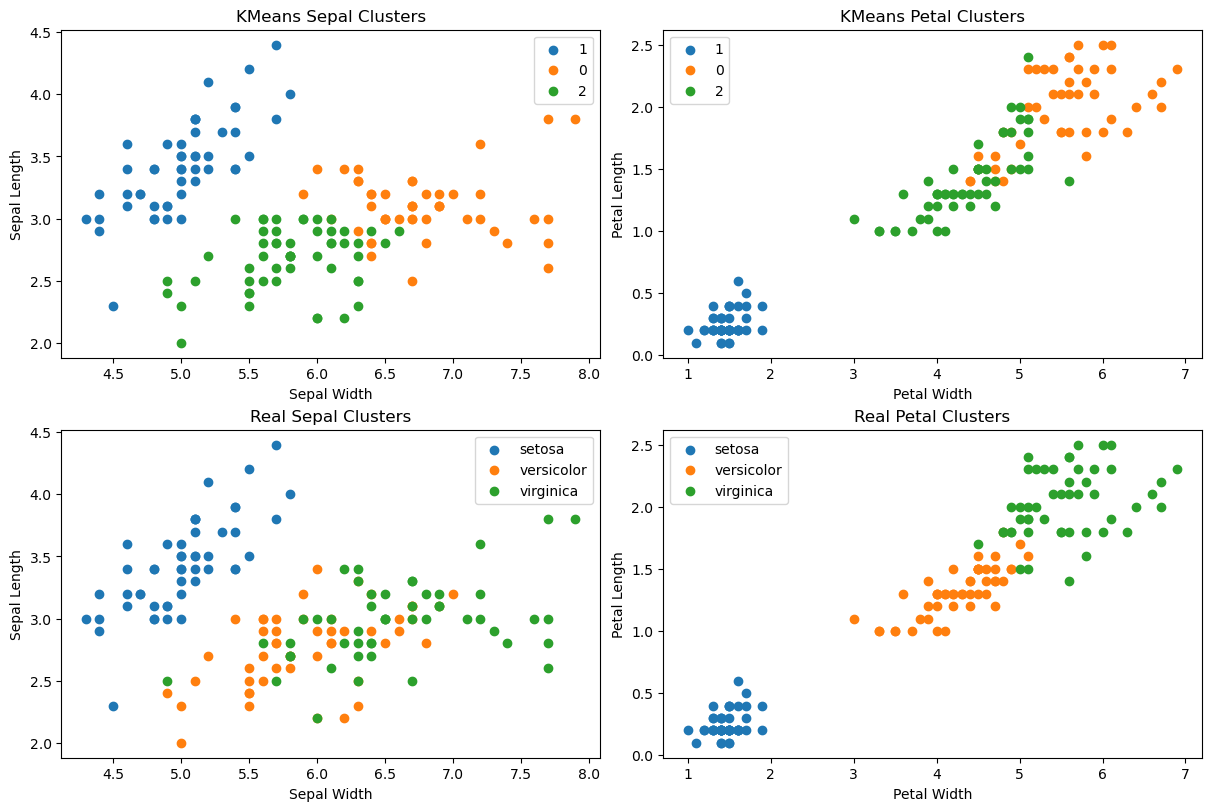

In [11]:
iris_df['cluster']=kmeans.labels_


fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,8),constrained_layout = True)

for c in iris_df.cluster.unique():
    sub_df=iris_df[iris_df.cluster==c]
    ax[0,0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=c)
    ax[0,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=c)
    
ax[0,0].set_ylabel('Sepal Length')
ax[0,0].set_xlabel('Sepal Width')
ax[0,0].set_title('KMeans Sepal Clusters')
ax[0,0].legend()
ax[0,1].set_ylabel('Petal Length')
ax[0,1].set_xlabel('Petal Width')
ax[0,1].set_title('KMeans Petal Clusters')
ax[0,1].legend()

for species in iris.target_names:
    sub_df=iris_df[iris_df.species_name==species]
    ax[1,0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=species)
    ax[1,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=species)
    
ax[1,0].set_ylabel('Sepal Length')
ax[1,0].set_xlabel('Sepal Width')
ax[1,0].set_title('Real Sepal Clusters')
ax[1,0].legend()
ax[1,1].set_ylabel('Petal Length')
ax[1,1].set_xlabel('Petal Width')
ax[1,1].set_title('Real Petal Clusters')
ax[1,1].legend()
plt.show()
plt.show()

Keep in mind that the clustering model doesn't know what the labels <i><b>actually</b></i> are but has sorted the data into three clusters as best that it can. Comparing it to the real data, we can see that it has actually dones a pretty good job, with a few mixups between versicolor and virginica where they have overlapped.

However, we already knew there was 3 clusters, how would we approach this problem if we didn't know?

There are two approaches, the elbow method and silhouette method.

### Elbow

In the elbow method we run the KMeans model several times, each with a different number of clusters. We then calculate the SSE for each one and plot them on a line graph:

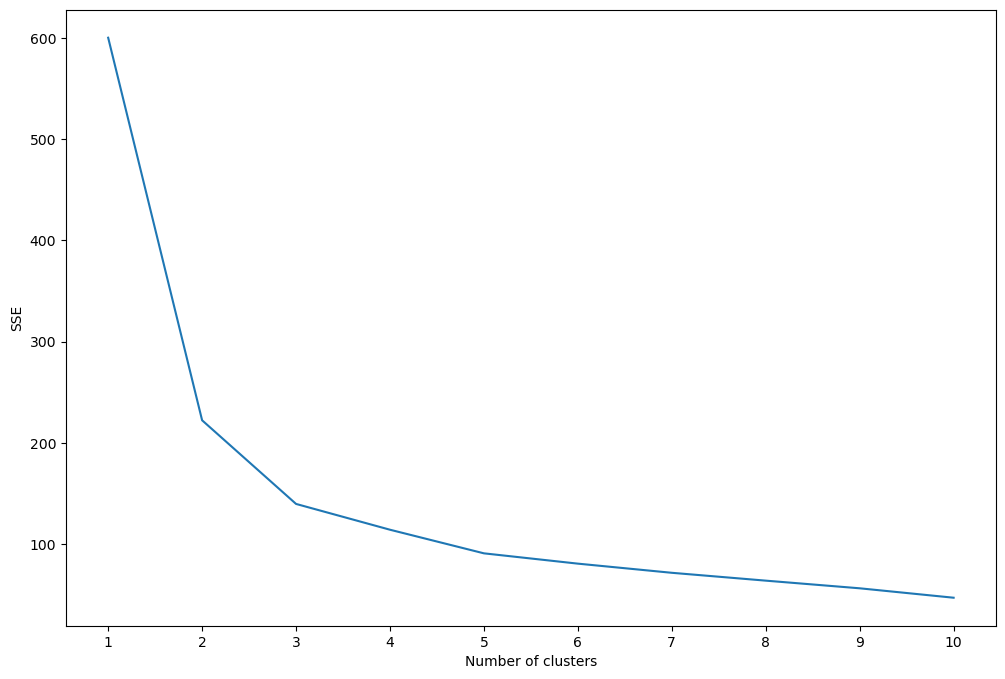

In [12]:
sse=[]

for k in range(1,11):
    kmeans=KMeans(init='random',n_clusters=k,random_state=42, n_init = 'auto')
    kmeans.fit(features_std)
    sse.append(kmeans.inertia_)
    
fig, ax =plt.subplots(figsize=(12,8))
ax.plot(range(1,11),sse)
ax.set_xticks(range(1,11))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('SSE')
plt.show()

You would think you would select the model with the lowest SSE, but it isn't that simple. As you add more clusters, data points are naturally going to be closer to the centre. What we want to select is the 'elbow' of the graph where it starts to bend. The number of clusters here is the optimal number of clusters, so in this case we would select 2 or 3 clusters.

### Silhouette Coefficient

A more robust method is to calculate the <b>sihouette coefficient</b>. This calculates for each datapoint a score based on how close it is to other points in its cluster, and how far away it is from points in other clusters. The coefficient ranges from -1 to 1, with 1 being the best score:

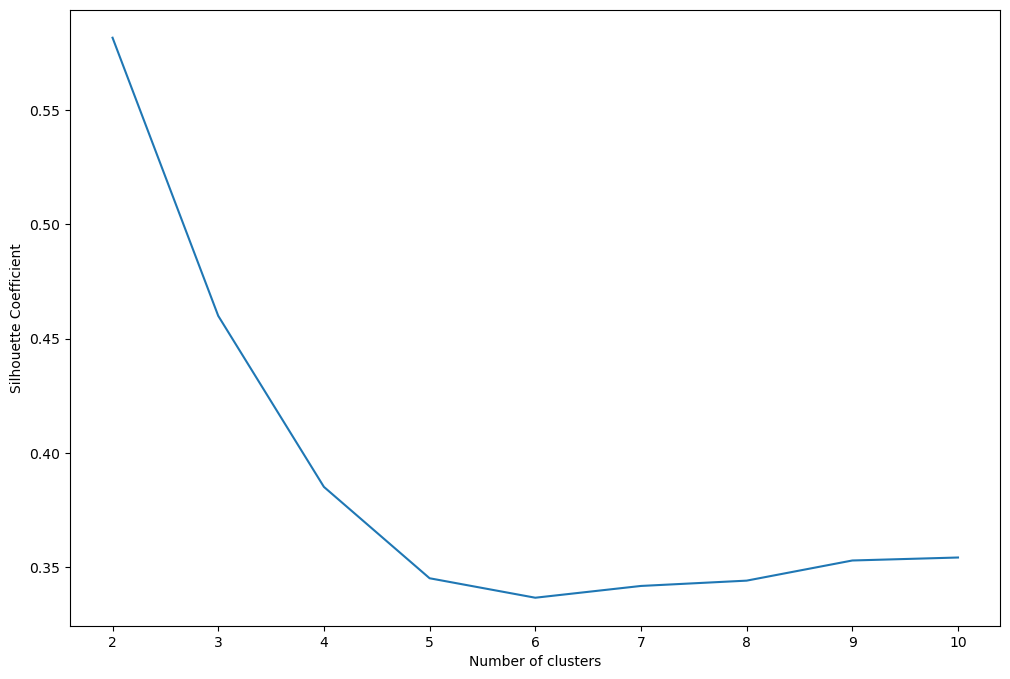

In [13]:
from sklearn.metrics import silhouette_score

silhouette_coefficients=[]

for k in range(2,11): #note, for this function to work there must be a minimum of 2 clusters
    kmeans=KMeans(init='random',n_clusters=k,random_state=42, n_init = 'auto')
    kmeans.fit(features_std)
    score = silhouette_score(features_std, kmeans.labels_)
    silhouette_coefficients.append(score)
    
fig, ax =plt.subplots(figsize=(12,8))
ax.plot(range(2,11),silhouette_coefficients)
ax.set_xticks(range(2,11))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Coefficient')
plt.show()

In this case 2 clusters leads to the best coefficient, so we should be selecting two clusters for this model (although we know there is actually 3, virginica and versicolor do overlap, hence the confusion). Just for reference, the visualisation below shows what the data would like like with these different numbers of clusters (for convenience, I'm only going to show you the petal dimensions):

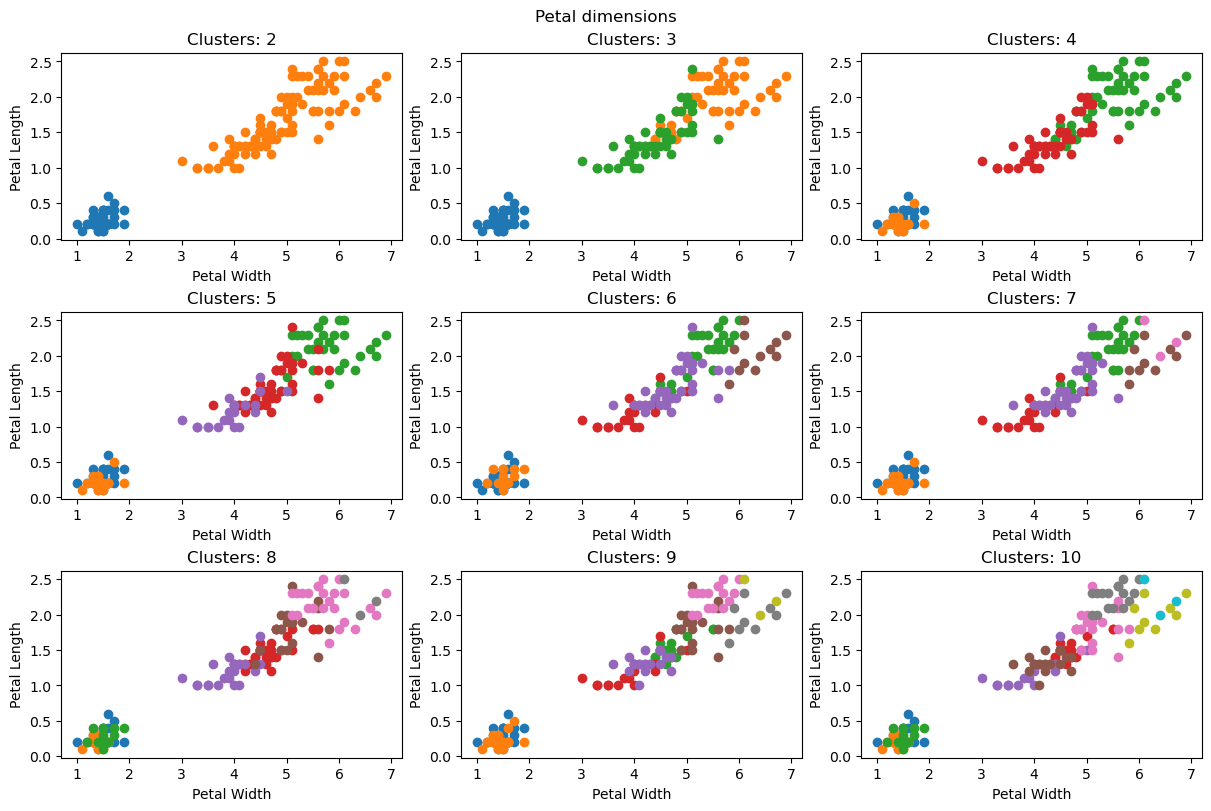

In [14]:
fig, ax = plt.subplots(ncols=3,nrows=3,figsize=(12,8),constrained_layout = True)

i=0
j=0

for k in range(2,11):
    kmeans=KMeans(init='random',n_clusters=k,random_state=42, n_init = 'auto')
    kmeans.fit(features_std)
    iris_df['cluster']=kmeans.labels_
      
    for c in iris_df.cluster.unique():
        sub_df=iris_df[iris_df.cluster==c]
        ax[i,j].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'])    
    ax[i,j].set_ylabel('Petal Length')
    ax[i,j].set_xlabel('Petal Width')
    ax[i,j].set_title('Clusters: '+str(k))
    if j<2:
        j+=1
    elif j==2:
        j=0
        i+=1

fig.suptitle('Petal dimensions')
plt.show()

## Practice

HELP internation is an NGO that is committed to fighting poverty and has supplied a dataset that contains for each country information on health data and economy. You can read the documentation <a href='https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data'> here</a>. 

Using this data build a KMeans model using whatever features you like. Decide on the optimal number of clusters and plot the results.

In [32]:
country=pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 2) Density Based

Whereas partitional clustering uses an iterative method to decide on the optimal location for clusters, density based clustering instead bases the clusters off the density of data points in a region. Essentially, it looks for dense groups of data points that are separated by areas of relatively low density. 

Think about a map which shows where everyone in an area lives. You are likely going to have areas of high density (towns) separated by areas of low density (countryside). A density based clustering model will create clusters around each town (with the people who live in the country being assigned to the nearest one).

Another difference with partitional models is that you don't have to specify the number of clusters, instead there is a distance-based parameter that determines how close data points need to be to be assigned to a cluster. 

Advantages of these types of model are that they work well with complex shapes of data and are resistant to outliers. A disadvantage is that they can struggle when clusters have inconsistent densities.

The most common type of density based clustering model is DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

Note, that it has two major parameters that you should consider when building the model:

<ol>
    <li> <b>Epsilon Value (eps)</b>- Imagine if we were to draw a circle around each data point, the epsilon value is the radius of that circle. Every other data point that falls within that circle is considered a neighbor. You can set this value to whatever you want, but be careful. Set it too small and the model will not be able to identify many neighbors and therefore fail to build enough clusters. Set it too large then you will find clusters begin to merge. Normally you would choose the value based on the range of the data, but it is usual to set it quite small (less than 1 if the data has been standardized).</li>
    <li> <b>Minimum points (min_samples)</b>- The minimum number of points in a region needed to build a cluster. If you know your dataset well you may know what this value is, otherwise a good idea is to set it to the number of features + 1. The minimum recommended is 3.</li>
</ol>

Once the model has been built, like before, it will assign labels. This time though there is a difference. If a data point does not have at least the number of defined minimum points within its circles radius (eps) it will be listed as an outlier (not part of any cluster). 

Let's build the model:

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
eps=0.5, 
min_samples=5 
)

In [16]:
dbscan.fit(features_std) #fit the scaled iris data from earlier

DBSCAN()

Let's see how the model has labelled our data:

In [17]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

Already this looks different to what we saw with KMeans. This model has identifed two clusters (0 and 1) with -1 being outliers. 

Some other definitions you should be aware of is how we can categorize the non outlier datapoints in the model:

<ul>
    <li> Core point - a point which has at least the minimum number of points (defined above) within its defined radius.</li>
    <li> Border point- a point which is within the defined radius of a core point, but does not have the minimum number of points within its own radius.</li>
</ul>

Let's now visualise this data and see how it has performed against the true data:

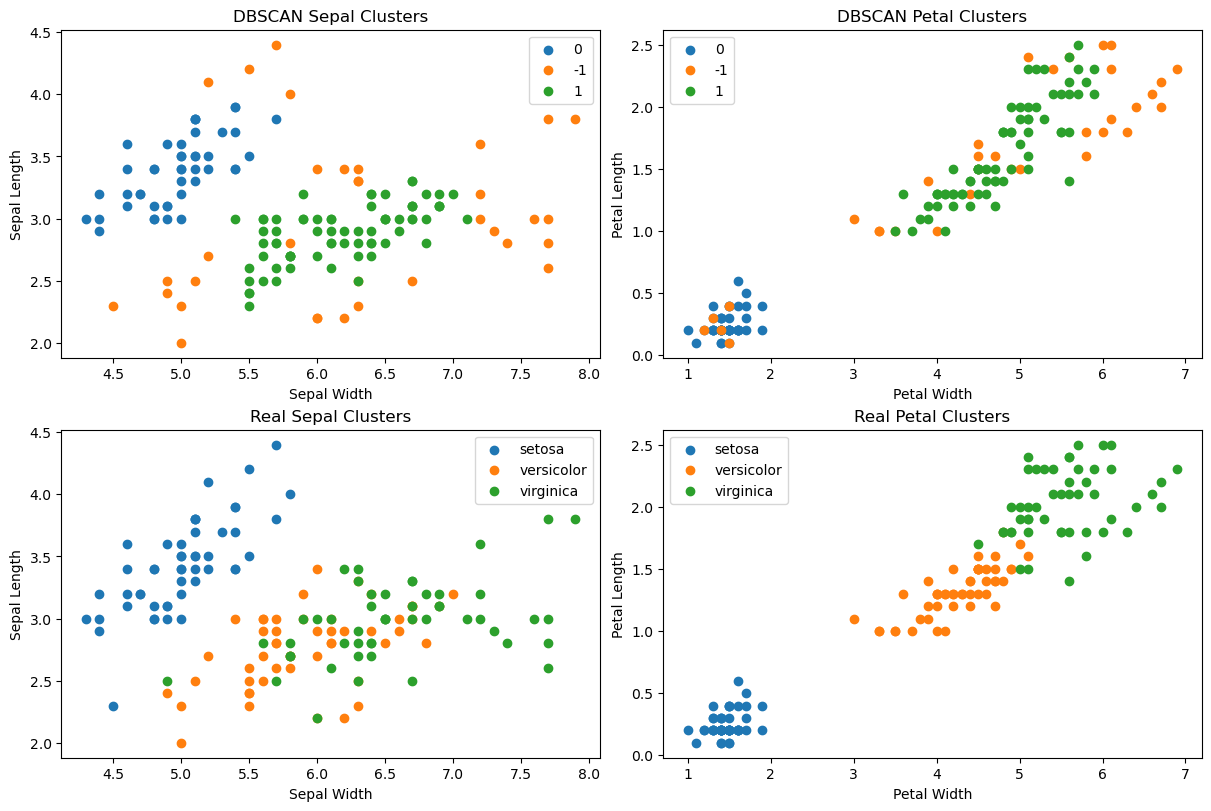

In [18]:
iris_df['cluster']=dbscan.labels_


fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,8),constrained_layout = True)

for c in iris_df.cluster.unique():
    sub_df=iris_df[iris_df.cluster==c]
    ax[0,0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=c)
    ax[0,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=c)
    
ax[0,0].set_ylabel('Sepal Length')
ax[0,0].set_xlabel('Sepal Width')
ax[0,0].set_title('DBSCAN Sepal Clusters')
ax[0,0].legend()
ax[0,1].set_ylabel('Petal Length')
ax[0,1].set_xlabel('Petal Width')
ax[0,1].set_title('DBSCAN Petal Clusters')
ax[0,1].legend()

for species in iris.target_names:
    sub_df=iris_df[iris_df.species_name==species]
    ax[1,0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=species)
    ax[1,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=species)
    
ax[1,0].set_ylabel('Sepal Length')
ax[1,0].set_xlabel('Sepal Width')
ax[1,0].set_title('Real Sepal Clusters')
ax[1,0].legend()
ax[1,1].set_ylabel('Petal Length')
ax[1,1].set_xlabel('Petal Width')
ax[1,1].set_title('Real Petal Clusters')
ax[1,1].legend()
plt.show()
plt.show()

The model seems to have done well with setosa but has merged virginica and versicolor together with many outliers surrounding. This seems like an OK starting point, but we can optimize.

Earlier we saw that the silhouette coefficient is a measure of how close data points are within their cluster, the larger the score the better the fit is. Let's try rebuilding this model with different epsilon scores and see which gives us the best fit:

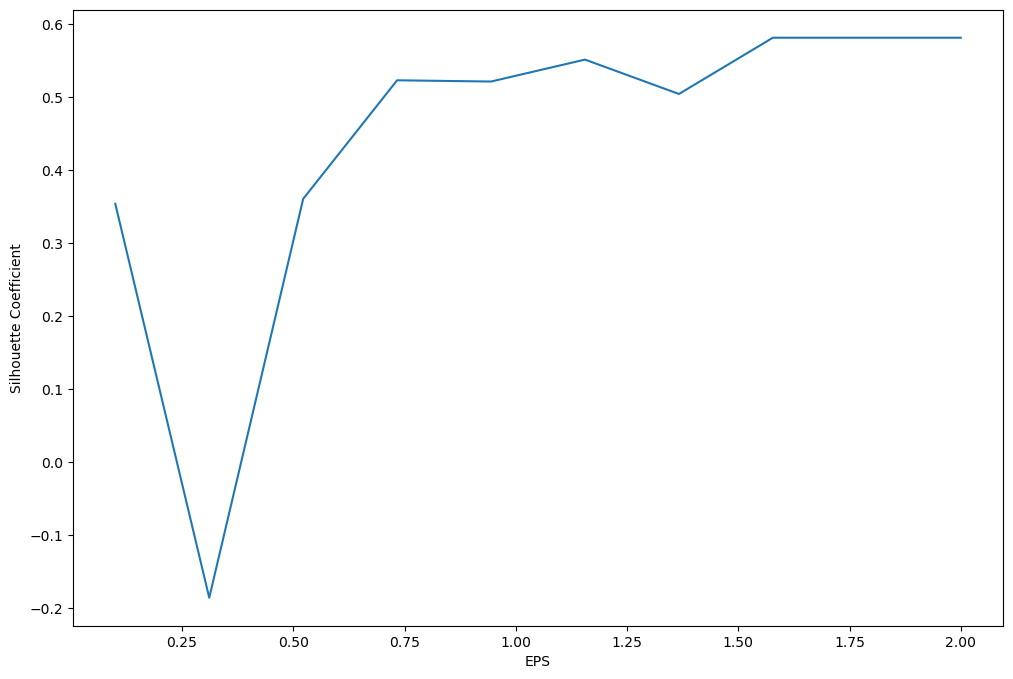

In [19]:
import numpy as np
silhouette_coefficients=[]

for eps in np.linspace(0.1,2,num=10): #returns a list of numbers within a range at equal intervals
    dbscan=dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(features_std)
    try:
        score = silhouette_score(features_std, dbscan.labels_)
    except:
        pass
    silhouette_coefficients.append(score)
    
fig, ax =plt.subplots(figsize=(12,8))
ax.plot(np.linspace(0.1,2,num=10),silhouette_coefficients)
ax.set_xlabel('EPS')
ax.set_ylabel('Silhouette Coefficient')
plt.show()

This diagram doesn't give the whole story, you can see that several epsilon values return the same silhouette coefficient. Keep in mind that the silhouette coefficient is a measue of how well data points fit into their clusters, so a model returning one massive cluster and another returning many small clusters (essentially all outliers) will both return high silhouette coefficients. We also need to visually look at the data:

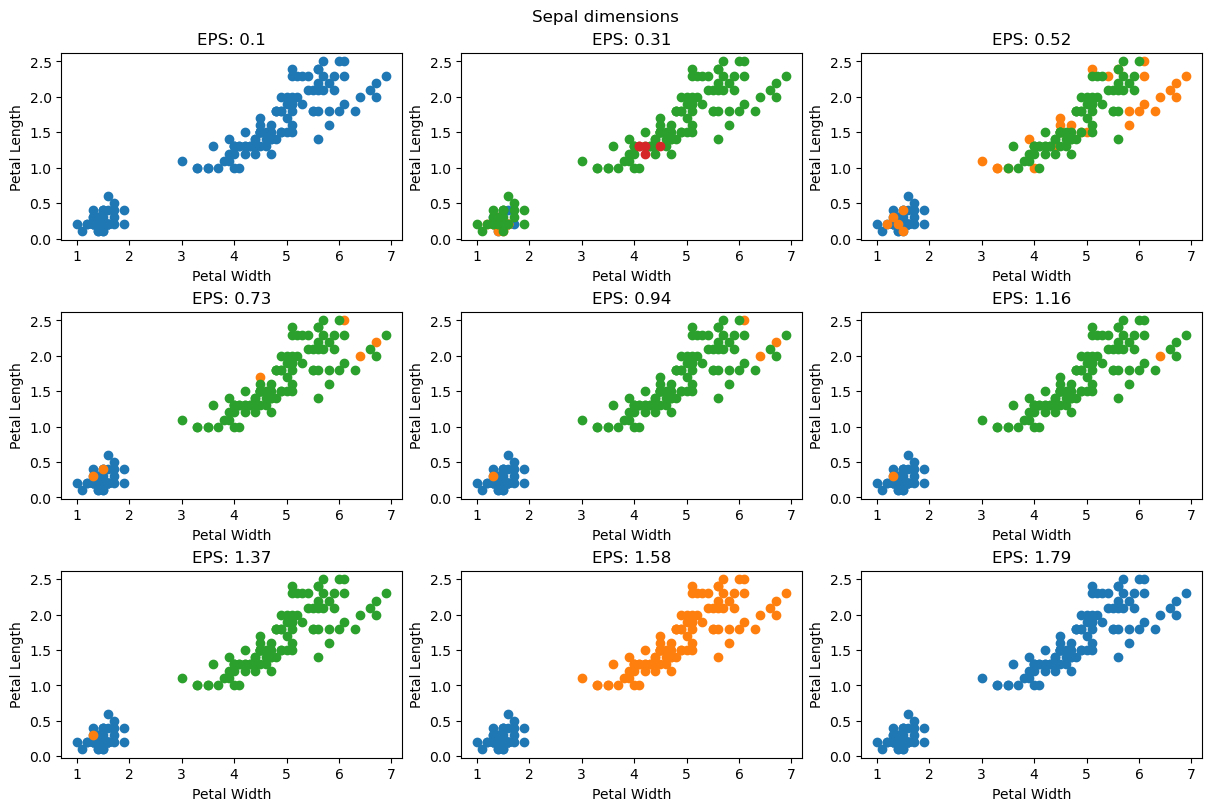

In [20]:
fig, ax = plt.subplots(ncols=3,nrows=3,figsize=(12,8),constrained_layout = True)

i=0
j=0

for eps in  np.linspace(0.1,2,num=10):
    dbscan=dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(features_std)
    iris_df['cluster']=dbscan.labels_
    try:  
        for c in iris_df.cluster.unique():
            sub_df=iris_df[iris_df.cluster==c]
            ax[i,j].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=c)    
        ax[i,j].set_ylabel('Petal Length')
        ax[i,j].set_xlabel('Petal Width')
        ax[i,j].set_title('EPS: '+str(round(eps,2)))
        if j<2:
            j+=1
        elif j==2:
            j=0
            i+=1
    except:
        pass
fig.suptitle('Sepal dimensions')
plt.show()

We can see from the smallest and highest epsilon values that the clustering is poor- eps=0.1 has made every datapoint an outlier, while eps=1.79 has created just one large cluster. Only eps=0.31 has been able to find 3 clusters. In this instance, to minimise outliers we want an epsilon value around 1.58.

For this demonstration, a density based clustering model has not proven itself to be ideal as it has struggled to unpick the virginicas from the versicolors due to the high density of points within their overlap regions. This is why it is always good to try different types of model as there will be occassions when models like DBSCAN will be highly effective (for example datasets which have several high density areas scattered about).

## Practice

Using the country data from earlier, build a clustering model using DBSCAN. Experiment with different epsilon values to see which produces the best fit. 

In [44]:
country=pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [45]:
features=country.iloc[:,1:]

## 3) Hierarchical 

The final type of clustering model is hierarchical clustering which builds clusters by building a hierarchy. It does this by making a decision tree called a dendrogram, which we then use to determine the number of clusters. 

The advantages of hierarchical clustering is that it provides an interpretable diagram and can reveal finer details about relationships between data points. The disadvantages is that it can take longer to compute and are sensitive to outliers.

So how does it work?

It begins by first defining each data point as a cluster. It will then for each possible combination of clusters calculate the distances between them. It will then merge together those clusters which are closest together. It will then keep repeating this process with each new set of clusters until one big cluster remains. 

For example, consider a group of students who have sat two tests:

,Test one,Test two
0,5,5
1,8,8
2,18,17
3,10,10
4,6,10
5,20,20
6,12,18


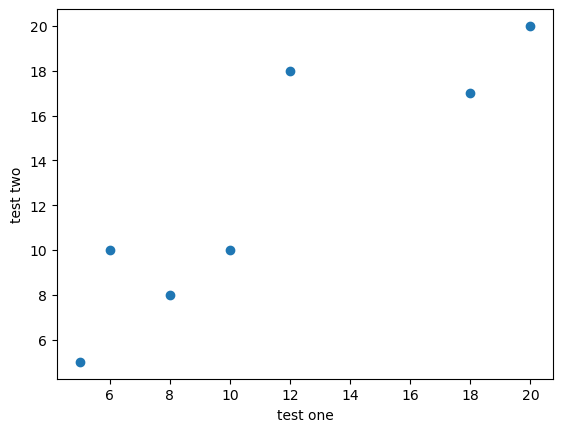

In [21]:
results=pd.DataFrame({'Test one':[5, 8, 18, 10, 6, 20, 12],'Test two':[5, 8, 17, 10, 10, 20, 18]})
display(results)

plt.scatter(results['Test one'],results['Test two'])
plt.xlabel('test one')
plt.ylabel('test two')
plt.show()

The hierarchical process begins by considering each point as its own cluster. It then calculates the distances between all clusters and merges those which are closest together. (The distance between two points is called the Euclidean distance, basically pythagoras).

From above, the two students who are 'closest' are 1 & 3, so they are merged into one cluster:

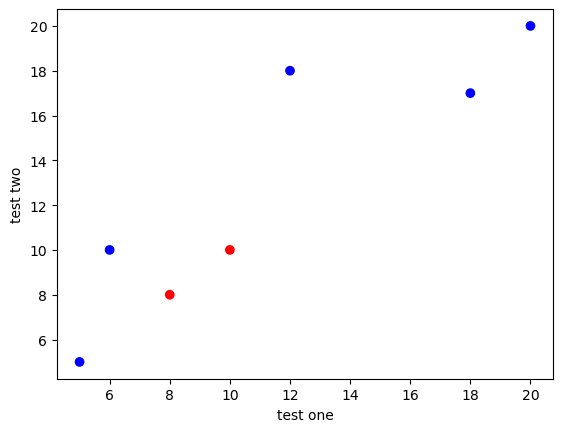

In [22]:
plt.scatter(results['Test one'],results['Test two'],c=['blue','red','blue','red','blue','blue','blue'])
plt.xlabel('test one')
plt.ylabel('test two')
plt.show()

The process is now repeated, but in this case the closest clusters is now a tie- between (1, 3) & 4 and also 2 & 5, so these are merged to create two new clusters:

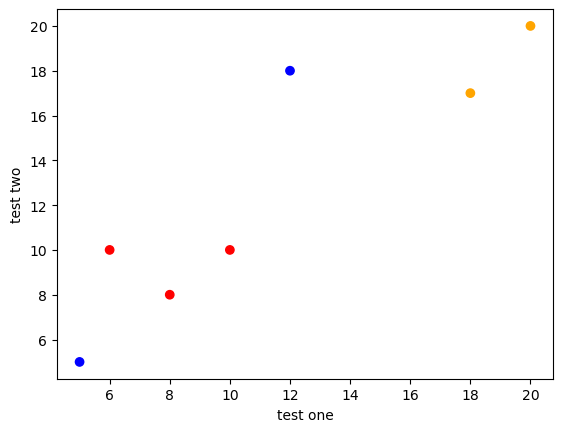

In [23]:
plt.scatter(results['Test one'],results['Test two'],c=['blue','red','orange','red','red','orange','blue'])
plt.xlabel('test one')
plt.ylabel('test two')
plt.show()

This process is repeated until there is one large cluster:

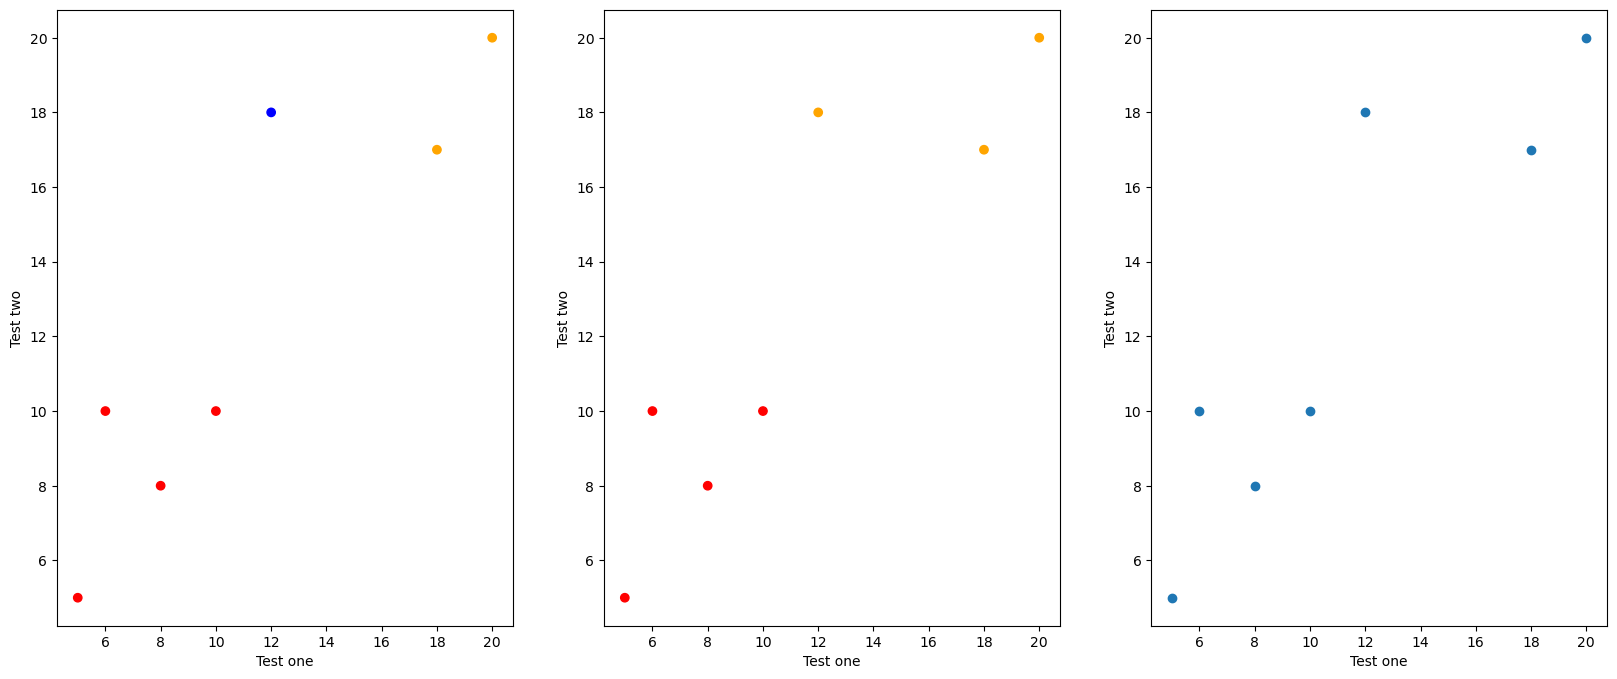

In [24]:
x=results['Test one']
y=results['Test two']

fig, ax =plt.subplots(ncols=3,figsize=(20,8))

ax[0].scatter(x,y,c=['red','red','orange','red','red','orange','blue'])
ax[0].set_xlabel('Test one')
ax[0].set_ylabel('Test two')
ax[1].scatter(x,y,c=['red','red','orange','red','red','orange','orange'])
ax[1].set_xlabel('Test one')
ax[1].set_ylabel('Test two')
ax[2].scatter(x,y)
ax[2].set_xlabel('Test one')
ax[2].set_ylabel('Test two')
plt.show()

There is another way of visualizing this- using a dendrogram. This plots along the x axis the different initial clusters, and the y axis the distances between clusters before they were merged. The larger the vertical line, the larger the distance was between those clusters at the point of merging.

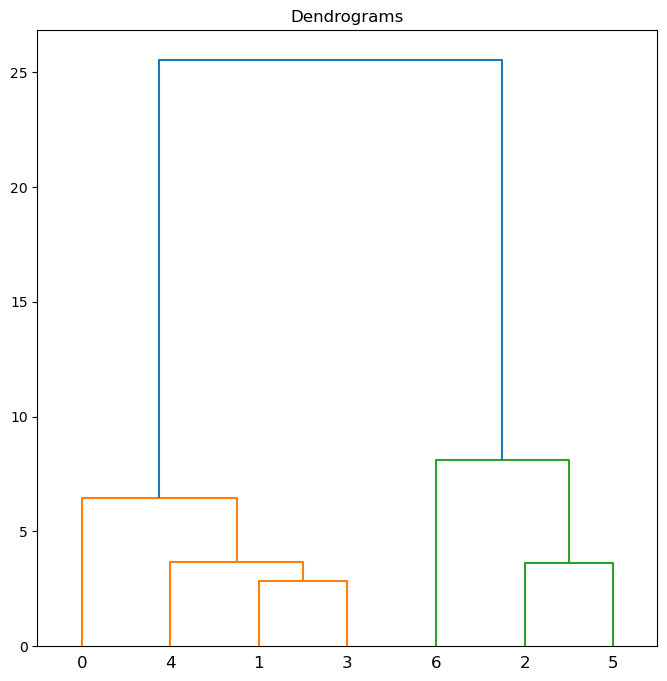

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8,8))
plt.title('Dendrograms')
dend=shc.dendrogram(shc.linkage(pd.DataFrame({'x':x,'y':y}),method='ward'))

You can see the same process as before, with each 'box' being the next iteration of clusters being merged. 

But how does this help us with making a clustering model?

It helps us decide how many clusters we need. What we do is set a 'threshold' distance which is a horizontal line that will cut through the tallest vertical line. The tallest vertical line in this example is the blue line, so we will want to cut off just above where it starts. 

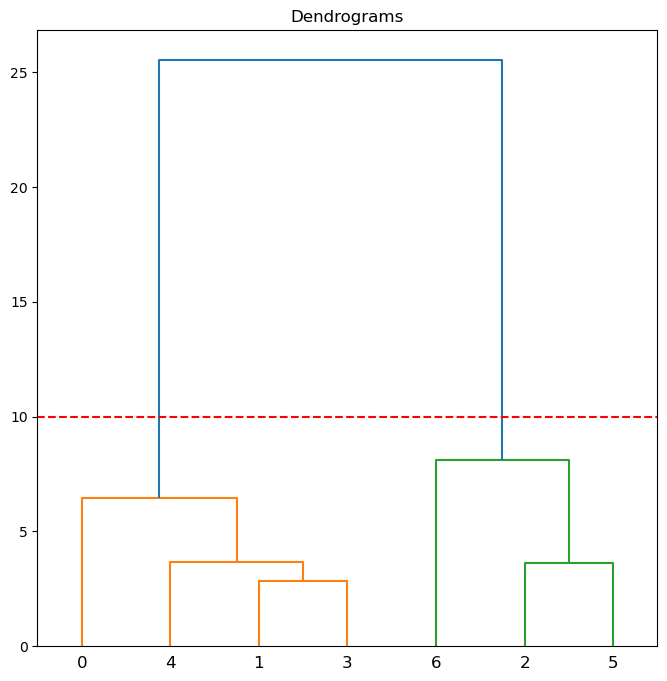

In [26]:
plt.figure(figsize=(8,8))
plt.title('Dendrograms')
dend=shc.dendrogram(shc.linkage(pd.DataFrame({'x':x,'y':y}),method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

Below this threshold we can see there are two distinct clusters, so in this example our clustering model would need to have two clusters.

Let's go back to our iris example and plot a dendrogram for that data:

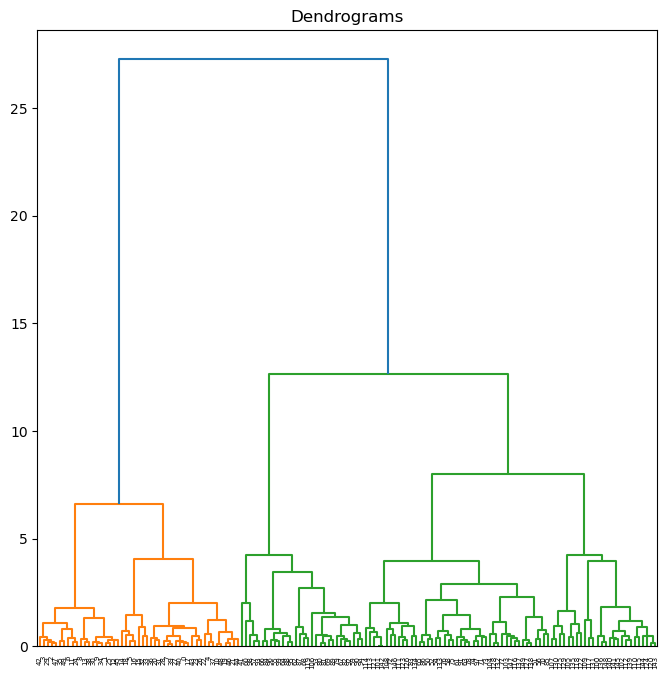

In [27]:
plt.figure(figsize=(8,8))
plt.title('Dendrograms')
dend=shc.dendrogram(shc.linkage(features_std,method='ward'))

Again, the tallest vertical line is the blue one, so we will want to cut off there:

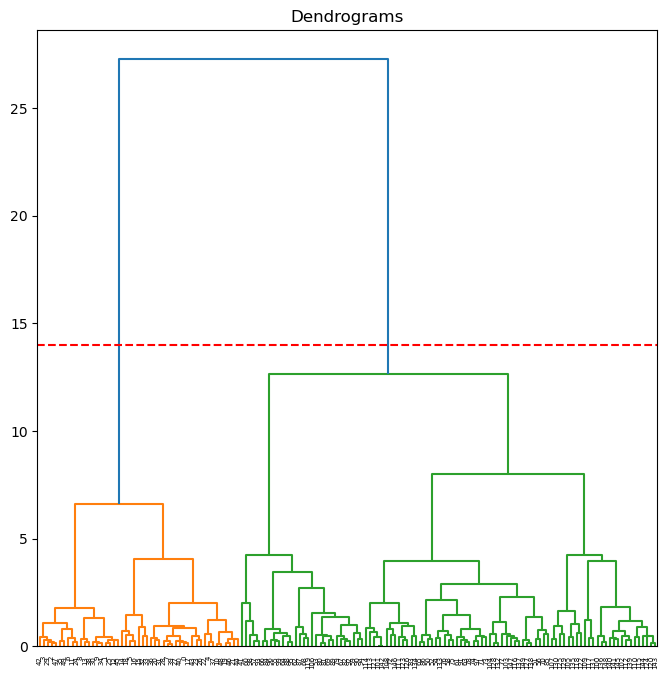

In [28]:
plt.figure(figsize=(8,8))
plt.title('Dendrograms')
dend=shc.dendrogram(shc.linkage(features_std,method='ward'))
plt.axhline(y=14, color='r', linestyle='--')
plt.show()

This tell us that the optimal approach for this data is two clusters (by the way, this approach can also be used to find the optimal number of clusters for KMeans).

So we now know how many clusters we need, let's build the hierarchical model. For this example, we will be using a hierarchical model called Agglomerative clustering:

In [29]:
from sklearn.cluster import AgglomerativeClustering

agg=AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agg.fit(features_std)

AgglomerativeClustering(metric='euclidean')

Like before we can see what labels the model has assigned:

In [30]:
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Like before, let's plot this against the real values to see how accurate it has been:

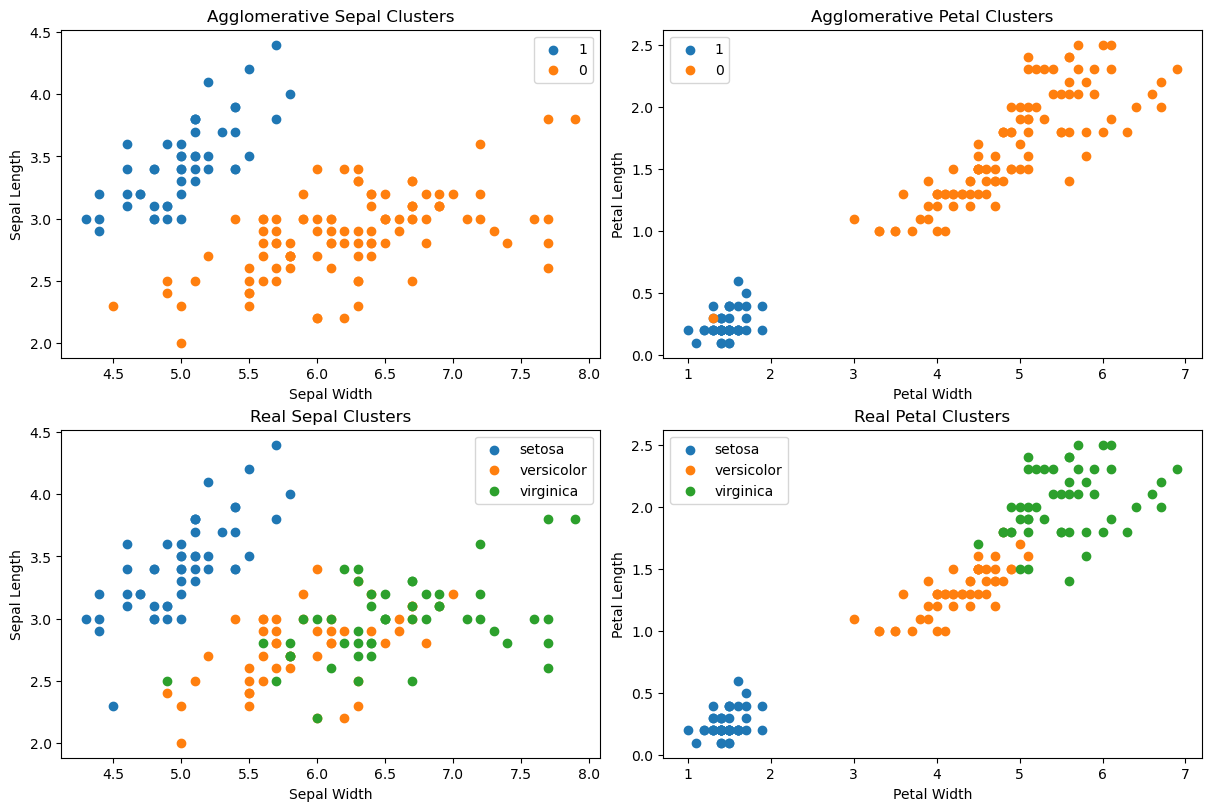

In [31]:
iris_df['cluster']=agg.labels_


fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,8),constrained_layout = True)

for c in iris_df.cluster.unique():
    sub_df=iris_df[iris_df.cluster==c]
    ax[0,0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=c)
    ax[0,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=c)
    
ax[0,0].set_ylabel('Sepal Length')
ax[0,0].set_xlabel('Sepal Width')
ax[0,0].set_title('Agglomerative Sepal Clusters')
ax[0,0].legend()
ax[0,1].set_ylabel('Petal Length')
ax[0,1].set_xlabel('Petal Width')
ax[0,1].set_title('Agglomerative Petal Clusters')
ax[0,1].legend()

for species in iris.target_names:
    sub_df=iris_df[iris_df.species_name==species]
    ax[1,0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=species)
    ax[1,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=species)
    
ax[1,0].set_ylabel('Sepal Length')
ax[1,0].set_xlabel('Sepal Width')
ax[1,0].set_title('Real Sepal Clusters')
ax[1,0].legend()
ax[1,1].set_ylabel('Petal Length')
ax[1,1].set_xlabel('Petal Width')
ax[1,1].set_title('Real Petal Clusters')
ax[1,1].legend()
plt.show()
plt.show()

Again, the issue with this data is that there is a significant overlap between versicolor and virginica which has caused the model to think there are only two clusters. However, using two clusters the model has been able to separate out the setosa's quite well.

Let's check how it performs with three clusters, as we know this is how many there should be:

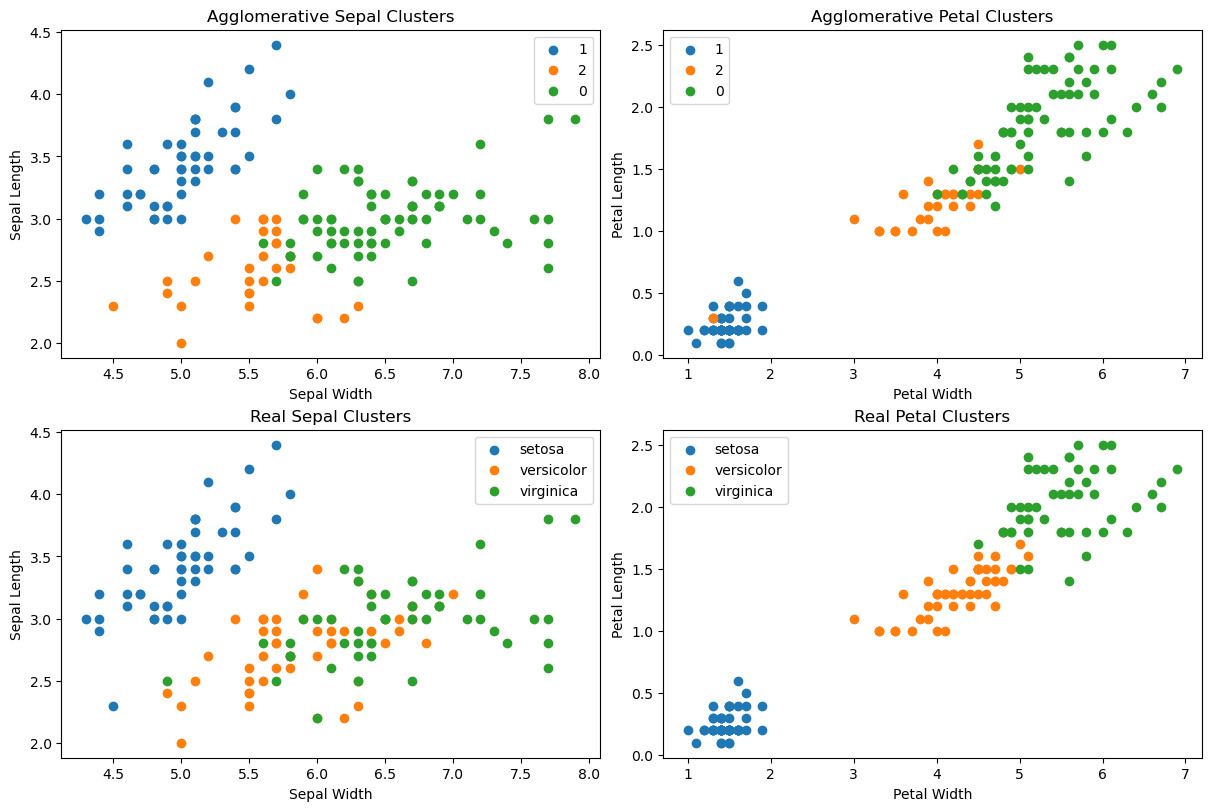

In [32]:
agg=AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg.fit(features_std)
iris_df['cluster']=agg.labels_


fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,8),constrained_layout = True)

for c in iris_df.cluster.unique():
    sub_df=iris_df[iris_df.cluster==c]
    ax[0,0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=c)
    ax[0,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=c)
    
ax[0,0].set_ylabel('Sepal Length')
ax[0,0].set_xlabel('Sepal Width')
ax[0,0].set_title('Agglomerative Sepal Clusters')
ax[0,0].legend()
ax[0,1].set_ylabel('Petal Length')
ax[0,1].set_xlabel('Petal Width')
ax[0,1].set_title('Agglomerative Petal Clusters')
ax[0,1].legend()

for species in iris.target_names:
    sub_df=iris_df[iris_df.species_name==species]
    ax[1,0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=species)
    ax[1,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=species)
    
ax[1,0].set_ylabel('Sepal Length')
ax[1,0].set_xlabel('Sepal Width')
ax[1,0].set_title('Real Sepal Clusters')
ax[1,0].legend()
ax[1,1].set_ylabel('Petal Length')
ax[1,1].set_xlabel('Petal Width')
ax[1,1].set_title('Real Petal Clusters')
ax[1,1].legend()
plt.show()
plt.show()

When using 3 clusters (like we know there are), the model appears to have grouped the data very well. This shows why it is important you understand your data. The investigative techniques to decide the optimal clusters are very useful, but your own knowledge about the data is even more so. If you know how many clusters there should be, use that value. These techniques are for when you are unsure about the data and looking to get a starting point. 


## Comparison

How does this model compare to the other types we made earlier? 

Let's plot the best model from each type that shows 3 clusters, and also compare it to the real clusters. For ease we will only do this for petal dimensions:

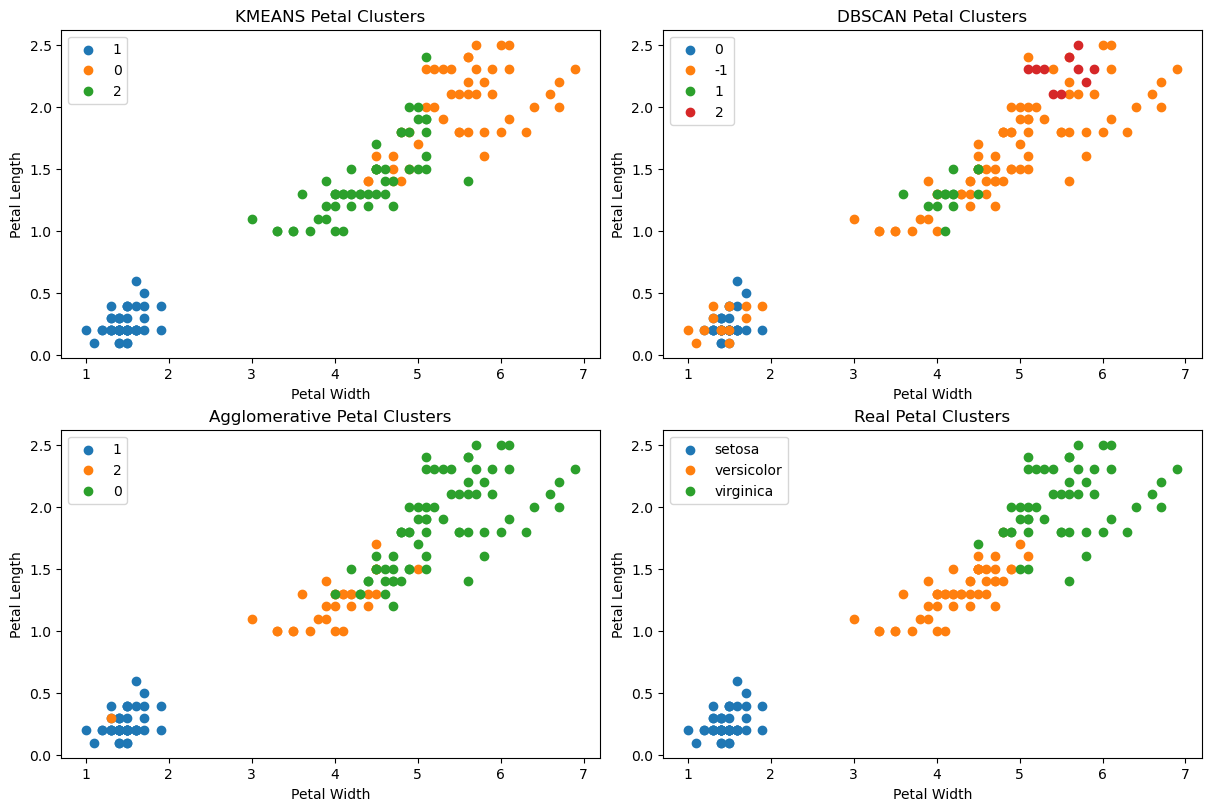

In [33]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,8),constrained_layout = True)

kmeans=KMeans(init='random',n_clusters=3,random_state=42, n_init = 'auto')
kmeans.fit(features_std)
iris_df['kmeans_cluster']=kmeans.labels_

for c in iris_df.kmeans_cluster.unique():
    sub_df=iris_df[iris_df.kmeans_cluster==c]
    ax[0,0].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=c)
    
ax[0,0].set_ylabel('Petal Length')
ax[0,0].set_xlabel('Petal Width')
ax[0,0].set_title('KMEANS Petal Clusters')
ax[0,0].legend()

dbscan=dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(features_std)
iris_df['dbscan_cluster']=dbscan.labels_

for c in iris_df.dbscan_cluster.unique():
    sub_df=iris_df[iris_df.dbscan_cluster==c]
    ax[0,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=c)
    
ax[0,1].set_ylabel('Petal Length')
ax[0,1].set_xlabel('Petal Width')
ax[0,1].set_title('DBSCAN Petal Clusters')
ax[0,1].legend()

agg=AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg.fit(features_std)
iris_df['agg_cluster']=agg.labels_

for c in iris_df.agg_cluster.unique():
    sub_df=iris_df[iris_df.agg_cluster==c]
    ax[1,0].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=c)
    
ax[1,0].set_ylabel('Petal Length')
ax[1,0].set_xlabel('Petal Width')
ax[1,0].set_title('Agglomerative Petal Clusters')
ax[1,0].legend()

for species in iris.target_names:
    sub_df=iris_df[iris_df.species_name==species]
    ax[1,1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=species)
    
ax[1,1].set_ylabel('Petal Length')
ax[1,1].set_xlabel('Petal Width')
ax[1,1].set_title('Real Petal Clusters')
ax[1,1].legend()
plt.show()
plt.show()

Visually comparing different models isn't the most robust method however, what would be better is to compare silhouette coefficients which will show how well each data point fits into its own cluster:

In [34]:
kmeans_sil=silhouette_score(features_std, kmeans.labels_)
dbscan_sil=silhouette_score(features_std, dbscan.labels_)
agg_sil=silhouette_score(features_std, agg.labels_)

scores=pd.DataFrame({'KMeans':kmeans_sil,'DBSCAN':dbscan_sil,'Agglomerative':agg_sil},index=['Silhouette Coefficient']).T
scores

,Silhouette Coefficient
KMeans,0.459948
DBSCAN,0.009426
Agglomerative,0.446689


In this example then, the most effective model for clustering our data is the agglomerative clustering model. 

As has been said before, whenever you are building a machine learning model you should always try multiple methods and optimise your parameters to find the best model. 

With these types of clustering model you can segment populations to find groups within your data, or even use the results to build a classification model.

## Practice

Using the country data from before, build a hierarchical model using the optimal number of clusters. 

[Stretch] Investigate what countries are in each cluster and suggest what might link them.

In [66]:
country=pd.read_csv('Country-data.csv')
country.head()
features=country.iloc[:,1:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)